In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# from nufit 5.3 http://www.nu-fit.org/?q=node/278

# normal ordering, degrees, eV^2, symmetrized errors, 3l = 31 for NO, 3l = 32 for IO

# degrees
theta12 = 33.66
theta12_err = 0.5*(0.73+0.70)
theta23 = 49.1
theta23_err = 0.5*(1.0+1.3)
theta13 = 8.54
theta13_err = 0.5*(0.11+0.11)
deltaCP = 197
deltaCP_err = 0.5*(41+25)
# eV^2
delta2_m21 = 7.41e-5
delta2_m21_err = 0.5*(0.21+0.20)*1e-5
delta2_m3l = 2.511e-3
delta2_m3l_err = 0.5*(0.027+0.027)*1e-3

# inverted ordering

# degrees
theta12_inv = 33.67
theta12_inv_err = 0.5*(0.73+0.71)
theta23_inv = 49.5
theta23_inv_err = 0.5*(0.9+1.2)
theta13_inv = 8.57
theta13_inv_err = 0.5*(0.11+0.11)
deltaCP_inv = 286
deltaCP_inv_err = 0.5*(27+32)
# eV^2
delta2_m21_inv = 7.41e-5
delta2_m21_inv_err = 0.5*(0.21+0.20)*1e-5
delta2_m3l_inv = -2.498e-3
delta2_m3l_inv_err = 0.5*(0.032+0.024)*1e-3

def get_param_samples(n_samples, isNO=True, only_alpha_beta=False):

    if isNO:
        if only_alpha_beta:
            theta12_samples = np.array([theta12]*n_samples)
            theta23_samples = np.array([theta23]*n_samples)
            theta13_samples = np.array([theta13]*n_samples)
            deltaCP_samples = np.array([deltaCP]*n_samples)
            delta2_m21_samples = np.array([delta2_m21]*n_samples)
            delta2_m3l_samples = np.array([delta2_m3l]*n_samples)

        else:
            theta12_samples = np.random.normal(theta12, theta12_err, n_samples)
            theta23_samples = np.random.normal(theta23, theta23_err, n_samples)
            theta13_samples = np.random.normal(theta13, theta13_err, n_samples)
            deltaCP_samples = np.random.normal(deltaCP, deltaCP_err, n_samples)
            delta2_m21_samples = np.random.normal(delta2_m21, delta2_m21_err, n_samples)
            delta2_m21_samples = np.clip(delta2_m21_samples, 0, None) # ensure positive
            delta2_m3l_samples = np.random.normal(delta2_m3l, delta2_m3l_err, n_samples)
            delta2_m3l_samples = np.clip(delta2_m3l_samples, 0, None) # ensure positive
    else:
        if only_alpha_beta:
            theta12_samples = np.array([theta12_inv]*n_samples)
            theta23_samples = np.array([theta23_inv]*n_samples)
            theta13_samples = np.array([theta13_inv]*n_samples)
            deltaCP_samples = np.array([deltaCP_inv]*n_samples)
            delta2_m21_samples = np.array([delta2_m21_inv]*n_samples)
            delta2_m3l_samples = np.array([delta2_m3l_inv]*n_samples)
        else:
            theta12_samples = np.random.normal(theta12_inv, theta12_inv_err, n_samples)
            theta23_samples = np.random.normal(theta23_inv, theta23_inv_err, n_samples)
            theta13_samples = np.random.normal(theta13_inv, theta13_inv_err, n_samples)
            deltaCP_samples = np.random.normal(deltaCP_inv, deltaCP_inv_err, n_samples)
            delta2_m21_samples = np.random.normal(delta2_m21_inv, delta2_m21_err, n_samples)
            delta2_m21_samples = np.clip(delta2_m21_samples, 0, None) # ensure negative
            delta2_m3l_samples = np.random.normal(delta2_m3l_inv, delta2_m3l_inv_err, n_samples)
            delta2_m3l_samples = np.clip(delta2_m3l_samples, None, 0) # ensure positive


    alpha1_samples = np.random.uniform(0, 2*np.pi, n_samples)
    alpha2_samples = np.random.uniform(0, 2*np.pi, n_samples)

    m_min_samples = 10**np.random.uniform(-4, -1, n_samples)

    isNOs = np.array([isNO]*n_samples)

    return np.array([theta12_samples, theta23_samples, theta13_samples, deltaCP_samples, delta2_m21_samples, delta2_m3l_samples, alpha1_samples, alpha2_samples, m_min_samples, isNOs]).T

def get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2):

    theta12 = np.radians(theta12)
    theta23 = np.radians(theta23)
    theta13 = np.radians(theta13)

    rot_23 = np.array([[
        [1, 0, 0],
        [0, np.cos(theta23), np.sin(theta23)],
        [0, -np.sin(theta23), np.cos(theta23)]
        ]])

    rot_13 = np.array([[
        [np.cos(theta13), 0, np.sin(theta13)*np.exp(-1j*deltaCP)],
        [0, 1, 0],
        [-np.sin(theta13)*np.exp(1j*deltaCP), 0, np.cos(theta13)]
        ]])

    rot_12 = np.array([[
        [np.cos(theta12), np.sin(theta12), 0],
        [-np.sin(theta12), np.cos(theta12), 0],
        [0, 0, 1]
        ]])
    
    majorana = np.diag([np.exp(1j*alpha1), np.exp(1j*alpha2), 1])

    return (rot_23 @ rot_13 @ rot_12 @ majorana)[0]


# todo: expand PMNS with sterile neutrino here





In [3]:
alpha1 = 0
alpha2 = 0

# assuming normal ordering, setting m1 = 0
m1 = 0
m2 = np.sqrt(delta2_m21)
m3 = np.sqrt(delta2_m3l)

U = get_PMNS(theta12, theta23, theta13, deltaCP, alpha1, alpha2)

# transpose U
U = U.T

c = 299792458 # m / s
hbar = 6.582119569e-16 # eV s

# from https://en.wikipedia.org/wiki/Neutrino_oscillation
def get_prob_numu_to_nue(L_over_E, U, m1, m2, m3):

    alpha = 1 # numu
    beta = 0 # nue

    P = 0

    for j in range(3):
        for k in range(3):
            if not (j > k):
                continue

            delta_m2_jk = [m1, m2, m3][j]**2 - [m1, m2, m3][k]**2

            P -= 4 * np.real(np.conj(U[alpha,j]) * U[beta,j] * U[alpha,k] * np.conj(U[beta,k])) * np.sin(1.26693268 * delta_m2_jk * L_over_E)**2
            P += 2 * np.imag(np.conj(U[alpha,j]) * U[beta,j] * U[alpha,k] * np.conj(U[beta,k])) * np.sin(2 * 1.26693268 * delta_m2_jk * L_over_E)
            
    return P


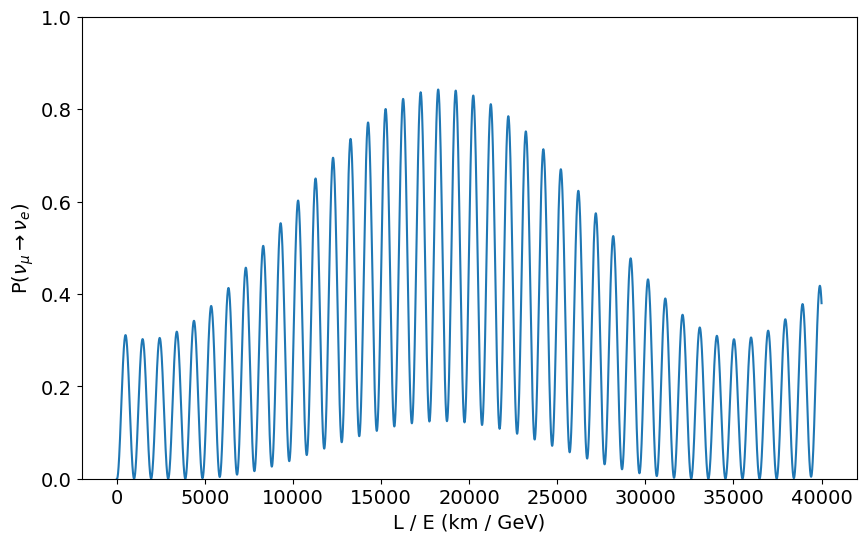

In [11]:
L_over_E_vals = np.linspace(0, 40000, 10000)

prob_vals = []
for L_over_E in L_over_E_vals:
    prob_vals.append(get_prob_numu_to_nue(L_over_E, U, m1, m2, m3))

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 6))
plt.plot(L_over_E_vals, prob_vals)
plt.ylim(0, 1)
plt.xlabel("L / E (km / GeV)")
plt.ylabel(r"P($\nu_\mu \rightarrow \nu_e$)")
plt.show()
